<a href="https://colab.research.google.com/github/Reemasree/Minor_project_imgclassification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 288 µs (started: 2021-02-22 23:40:50 +00:00)


In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir Images #create images folder

In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty birds pictures",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://tailandfur.com/wp-content/uploads/2014/11/Beautiful-Bird-Pictures-11.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://theawesomedaily.com/wp-content/uploads/2017/07/pictures-of-hummingbirds-3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.alphacoders.com/492/492674.jpg
[!] Issue getting: https://images.alphacoders.com/492/492674.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #3 from http://4.bp.blogspot.com/-3UF7D9yhJno/T3AREXlfnLI/AAAAAAAACsM/2jkmtuyxC2A/s1600/beautiful-birds-9.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://pre-tend.com/wp-content/uploads/2015/02/Rainbow-lorikeet-bird.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/9e/9c/d6/9e9cd657cf4ca4323e029dbf8708780f.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://1.bp.blogspot.com/-Vw3lpqVyjXI/Tw59UIaQvGI

In [ ]:
downloader.download("animals",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://wallup.net/wp-content/uploads/2016/01/185765-fox-animals-wildlife.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://news.nationalgeographic.com/content/dam/news/2016/02/24/01highanimals.ngsversion.1456244998811.jpg
[Error]Invalid image, not saving http://news.nationalgeographic.com/content/dam/news/2016/02/24/01highanimals.ngsversion.1456244998811.jpg

[!] Issue getting: http://news.nationalgeographic.com/content/dam/news/2016/02/24/01highanimals.ngsversion.1456244998811.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://mymodernmet.com/wp/wp-content/uploads/2019/01/forest-animals-photography-ossi-saarinen-20.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://wallup.net/wp-content/uploads/2016/01/214547-nature-animals-wildlife-lion.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.hdnicewallpapers.com/Walls/Big/L

**step-2:- Preprocessing**

In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR = '/content/images'
CATEGORIES = ['animals','pretty birds pictures']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path = os.path.join(DATADIR,category) #create path for images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized= resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
  
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

time: 33.7 s (started: 2021-02-23 02:14:50 +00:00)


In [ ]:
## SPLITTING

time: 1.2 ms (started: 2021-02-23 01:45:19 +00:00)


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 17.4 ms (started: 2021-02-23 02:15:30 +00:00)


In [37]:

from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 41.5 s (started: 2021-02-23 02:15:32 +00:00)


In [38]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

time: 98.5 ms (started: 2021-02-23 02:17:01 +00:00)


In [39]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 4.79 ms (started: 2021-02-23 02:17:05 +00:00)


In [40]:
## EVALUATION METRICS
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.8333333333333334

time: 5.3 ms (started: 2021-02-23 02:17:59 +00:00)


In [41]:
confusion_matrix(y_pred,y_test)

array([[8, 0],
       [3, 7]])

time: 13.1 ms (started: 2021-02-23 02:18:26 +00:00)


In [42]:
#SAVING THE MODEL
import pickle
pickle.dump(clf,open('image_model.p','wb'))

time: 31.9 ms (started: 2021-02-23 02:21:20 +00:00)


In [43]:
#opening the model
model = pickle.load(open('image_model.p','rb'))

time: 17.5 ms (started: 2021-02-23 02:24:46 +00:00)


Enter image URL: https://www.hdnicewallpapers.com/Walls/Big/Other%20Birds/Yellow_Bird_HD_Pictures.jpg
(1620, 2880, 3)
PREDICTED OUTPUT: pretty birds pictures


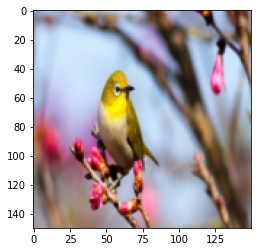

time: 1min 43s (started: 2021-02-23 02:45:16 +00:00)


In [48]:
#TESTING THE MODEL WITH NEW IMAGE

flat_data=[]
url = input('Enter image URL: ')
img=imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

Enter image URL: https://images.all-free-download.com/images/graphiclarge/peacock_on_grass_182711.jpg
(600, 450, 3)
PREDICTED OUTPUT: pretty birds pictures


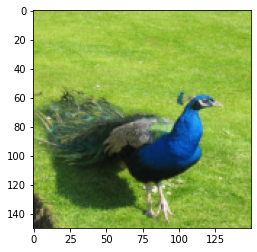

time: 5.46 s (started: 2021-02-23 02:55:11 +00:00)


In [51]:
flat_data=[]
url = input('Enter image URL: ')
img=imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

Enter image URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZ5AcgmKL8CVcuExCln2yeHpAip8rQhxfbXQ&usqp=CAU
(177, 284, 3)
PREDICTED OUTPUT: animals


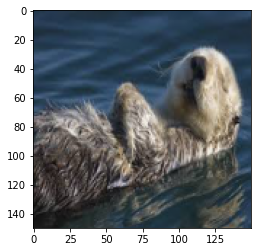

time: 22min 39s (started: 2021-02-23 02:55:43 +00:00)


In [52]:
flat_data=[]
url = input('Enter image URL: ')
img=imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')